In [127]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [128]:
data = pd.read_csv('data/Ch10Ex11.csv',header=None)
data.shape

(1000, 40)

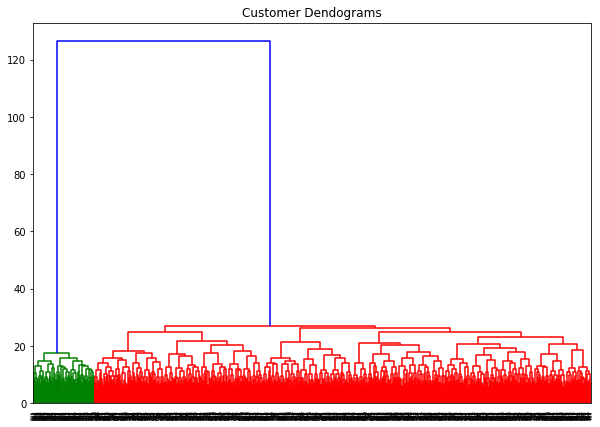

In [129]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [130]:
pca = PCA(n_components=2)
plot = pca.fit_transform(data)
pca.explained_variance_ratio_.sum()

0.21650433844741135

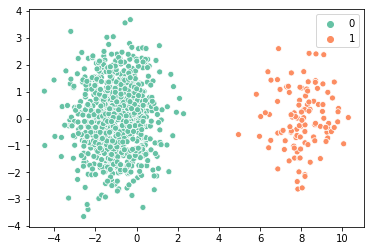

In [131]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
res = cluster.fit_predict(data)
sns.scatterplot(x=plot[:,0],y=plot[:,1],hue=res,palette="Set2") 

In [132]:
data = pd.DataFrame(np.random.rand(1000,2),columns=['x1','x2'])

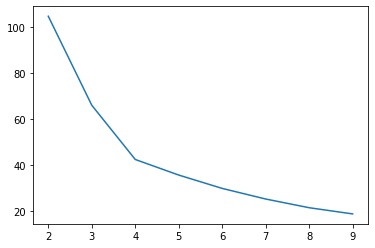

In [133]:
wcss =[]
clusters = range(2,10)
for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    wcss.append(kmeans.inertia_)

sns.lineplot(y=wcss, x= clusters,markers=True)

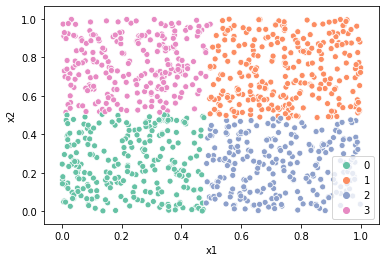

In [134]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
sns.scatterplot(x=data['x1'],y=data['x2'],hue=kmeans.labels_,palette="Set2") 